<a href="https://colab.research.google.com/github/ashamril/Text-Analytics/blob/master/Twitter_Sentiment_Analysis_on_any_keyword_here_in_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Sentiment Analysis on any_keyword_here in Malaysia
Using **Malaya**, a **Natural-Language-Toolkit** library for **Bahasa Malaysia**, powered by **Deep Learning Tensorflow**.<br>
**Malaya** provided basic interface for **Pre-trained Transformer encoder models**, specific to **Malay**, **local social media slang** and **Manglish** language, called **Transformer-Bahasa**.<br>
https://malaya.readthedocs.io/en/latest/

In [7]:
%pip install GetOldTweets3

In [8]:
%pip install malaya

     |████████████████████████████████| 4.0MB 2.8MB/s 
     |████████████████████████████████| 110.5MB 85kB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 245kB 35.2MB/s 
     |████████████████████████████████| 1.1MB 48.4MB/s 
     |████████████████████████████████| 215kB 42.4MB/s 
     |████████████████████████████████| 1.7MB 42.6MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 368kB 38.0MB/s 
     |████████████████████████████████| 512kB 40.6MB/s 
     |████████████████████████████████| 3.8MB 41.0MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45612 sha256=14b6cc6a34ded6600dacc45bb98c14733313a7ac58db00b550b72b7c2cc6a303
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=2

In [13]:
%pip install googletrans

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 931kB 7.9MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 102kB 8.3MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=d7161b63130267244e05b678425d04280f9154037472690c265cf0712f62780e
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=d99c17a51f8556b55839c95a7d464631d8a664148fb9d271a3212a0d10722b45
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [14]:
import malaya
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import GetOldTweets3 as got
import warnings
from googletrans import Translator

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [16]:
# Change accordingly
keyword = "mco OR pkp" # use OR or AND respectively, eg. mco OR pkp
location = "Kuala Lumpur, Malaysia"
start_date = "2020-07-20"    # yyyy-mm-dd
#latest_date = "2020-07-25"
#number_tweets = 100

In [17]:
# search_tweet = got.manager.TweetCriteria().setQuerySearch(keyword)\
#                                             .setNear(location)\
#                                             .setSince(start_date)\
#                                             .setUntil(latest_date)\
#                                             .setMaxTweets(number_tweets)

In [ ]:
# Search tweets usng keyword, location and start_date only
search_tweet = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                             .setNear(location)\
                                             .setSince(start_date)

tweet_df = pd.DataFrame({'got_criteria':got.manager.TweetManager.getTweets(search_tweet)})

In [29]:
print("Number of tweets collected: ")
tweet_df.count()

Number of tweets collected: 


got_criteria    1599
username        1599
tweet_text      1599
date            1599
hashtags        1599
link            1599
dtype: int64

In [19]:
def get_twitter_info():
    tweet_df["username"] = tweet_df["got_criteria"].apply(lambda x: x.username)
    tweet_df["tweet_text"] = tweet_df["got_criteria"].apply(lambda x: x.text)
    tweet_df["date"] = tweet_df["got_criteria"].apply(lambda x: x.date)
    tweet_df["hashtags"] = tweet_df["got_criteria"].apply(lambda x: x.hashtags)
    tweet_df["link"] = tweet_df["got_criteria"].apply(lambda x: x.permalink)

In [20]:
get_twitter_info()
df = tweet_df.drop(["got_criteria"], axis=1)
df

,username,tweet_text,date,hashtags,link
0,atikahyahya93,Sampai bila asyik nk PKP? It's impossible to k...,2020-07-26 07:25:40+00:00,,https://twitter.com/atikahyahya93/status/12872...
1,malaysiadude,Laaaa pastu kau nak negera kau miskin??? Sehar...,2020-07-26 07:24:11+00:00,,https://twitter.com/malaysiadude/status/128728...
2,staronline,Ismail Sabri: 617 detained on Saturday (July 2...,2020-07-26 07:22:22+00:00,,https://twitter.com/staronline/status/12872871...
3,staronline,Covid-19: MCO may be enforced again if cases r...,2020-07-26 07:22:17+00:00,,https://twitter.com/staronline/status/12872871...
4,fnajihahz_,Jangan pkp balik tu je mintak please lah jgn k...,2020-07-26 07:18:19+00:00,,https://twitter.com/fnajihahz_/status/12872861...
...,...,...,...,...,...
1594,serrasuhaimi,Berat before PKP dh achieved. Next target bera...,2020-07-20 01:47:03+00:00,,https://twitter.com/serrasuhaimi/status/128502...
1595,_umaraziz,"With another MCO looming, who knows whats in s...",2020-07-20 01:38:59+00:00,,https://twitter.com/_umaraziz/status/128502638...
1596,Media_Selangor,Selangor Journal | 78 individuals arrested for...,2020-07-20 01:31:33+00:00,,https://twitter.com/Media_Selangor/status/1285...
1597,amanhisham2,I haven’t touch his phone quite a while like s...,2020-07-20 00:58:25+00:00,,https://twitter.com/amanhisham2/status/1285016...


In [21]:
corpus = df["tweet_text"]
corpus_list = corpus.tolist()

In [22]:
#  Language detection
data = []
for i in corpus_list: 
  t = Translator().detect(i)
  data.append([t.lang, t.confidence, i])
  
detection_df = pd.DataFrame(data)
print(detection_df)

       0         1                                                  2
0     en  1.000000  Sampai bila asyik nk PKP? It's impossible to k...
1     ms  0.901573  Laaaa pastu kau nak negera kau miskin??? Sehar...
2     en  1.000000  Ismail Sabri: 617 detained on Saturday (July 2...
3     en  1.000000  Covid-19: MCO may be enforced again if cases r...
4     ms  0.969054  Jangan pkp balik tu je mintak please lah jgn k...
...   ..       ...                                                ...
1594  en  0.767790  Berat before PKP dh achieved. Next target bera...
1595  en  1.000000  With another MCO looming, who knows whats in s...
1596  en  1.000000  Selangor Journal | 78 individuals arrested for...
1597  en  1.000000  I haven’t touch his phone quite a while like s...
1598  en  1.000000  Haha maybe later la bang. Thinking to go hike ...

[1599 rows x 3 columns]


In [28]:
detection_df.columns = ['Lang','Confidence','Text']
detection_df['Lang'].value_counts().head(10)

ms       995
en       365
id        67
msid      63
idms      49
ja        10
pl        10
zh-CN      7
tl         6
hi         4
Name: Lang, dtype: int64

In [23]:
# Available Transformer models
malaya.sentiment.available_transformer()

{'albert': ['48.6 MB', 'accuracy: 0.992'],
 'alxlnet': ['46.8 MB', 'accuracy: 0.991'],
 'bert': ['425.6 MB', 'accuracy: 0.993'],
 'tiny-albert': ['22.4 MB', 'accuracy: 0.985'],
 'tiny-bert': ['57.4 MB', 'accuracy: 0.987'],
 'xlnet': ['446.5 MB', 'accuracy: 0.993']}

In [24]:
# Using stacking models for better results
# 3 models = BERT-base-bahasa, Multinomial (Complement Naive Bayes) and XLNET-base-bahasa
bert = malaya.sentiment.transformer('bert')
multinomial = malaya.sentiment.multinomial()
xlnet = malaya.sentiment.transformer('xlnet')

downloading frozen /root/Malaya/sentiment/bert/base model


100%|██████████| 426/426 [00:15<00:00, 27.9MB/s]


downloading frozen /root/Malaya/sentiment/bert/base vocab


184%|██████████| 1.00/0.54 [00:00<00:00, 2.81MB/s]


downloading frozen /root/Malaya/sentiment/bert/base tokenizer


135%|██████████| 1.00/0.74 [00:00<00:00, 2.26MB/s]


downloading frozen /root/Malaya/sentiment/multinomial model


3.00MB [00:00, 5.57MB/s]                          


downloading frozen /root/Malaya/sentiment/multinomial vector


117%|██████████| 3.00/2.57 [00:00<00:00, 5.66MB/s]


downloading frozen /root/Malaya/sentiment/multinomial bpe


120%|██████████| 1.00/0.83 [00:00<00:00, 2.29MB/s]


downloading frozen /root/Malaya/sentiment/xlnet/base model


447MB [00:17, 26.2MB/s]                         


downloading frozen /root/Malaya/sentiment/xlnet/base vocab


184%|██████████| 1.00/0.54 [00:00<00:00, 2.85MB/s]


downloading frozen /root/Malaya/sentiment/xlnet/base tokenizer


135%|██████████| 1.00/0.74 [00:00<00:00, 2.27MB/s]


In [25]:
def cls_corpus(corpus_list):

  data = []
  for i in corpus_list: 
    corpus_result = malaya.stack.predict_stack([bert, multinomial, xlnet], [i])
    for j in corpus_result:
      corpus_result = j.values()
      data.append([corpus_result, i])

  df = pd.DataFrame(data)
  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Positive', 'Neutral']
  df2['Classification'] = df2[['Negative','Positive','Neutral']].idxmax(axis=1)
  df2['Text'] = df[1]

  class_count  = df2['Classification'].value_counts().sort_index()
  plt.figure(figsize=(20,9))
  #sns.barplot(class_count.index, class_count.values, alpha=0.8)
  ax = class_count.plot.bar(color=['red', 'yellow', 'green'], figsize=(20, 9))
  plt.xticks(rotation=0)
  plt.title("Twitter Sentiment Analysis on {} in Malaysia".format(keyword), fontweight='bold', fontsize=15)
  plt.ylabel('Number of Sentiment', fontweight='bold', fontsize=15)
  plt.xlabel('Classification', fontweight='bold', fontsize=15)
  plt.grid(True)
  
  i = 0
  label = np.round(class_count.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.01), fontweight='bold', fontsize=15)
      i = i+1

  pd.options.display.max_columns = None
  pd.set_option('display.expand_frame_repr', False)
  print(df2)
  print("")
  print("Count of Classification: ")
  print(class_count)
  print("")
  print("Total Number of Tweets: ", df2['Classification'].count())
  print("")
  plt.show()

      Negative  Positive   Neutral Classification                                               Text
0     0.209227  0.000008  0.000401       Negative  Sampai bila asyik nk PKP? It's impossible to k...
1     0.956294  0.000003  0.000314       Negative  Laaaa pastu kau nak negera kau miskin??? Sehar...
2     0.000184  0.846592  0.018247       Positive  Ismail Sabri: 617 detained on Saturday (July 2...
3     0.015366  0.074340  0.189460        Neutral  Covid-19: MCO may be enforced again if cases r...
4     0.774485  0.000770  0.076201       Negative  Jangan pkp balik tu je mintak please lah jgn k...
...        ...       ...       ...            ...                                                ...
1594  0.018242  0.102665  0.328137        Neutral  Berat before PKP dh achieved. Next target bera...
1595  0.000858  0.820907  0.084991       Positive  With another MCO looming, who knows whats in s...
1596  0.004528  0.245335  0.448306        Neutral  Selangor Journal | 78 individuals arrest

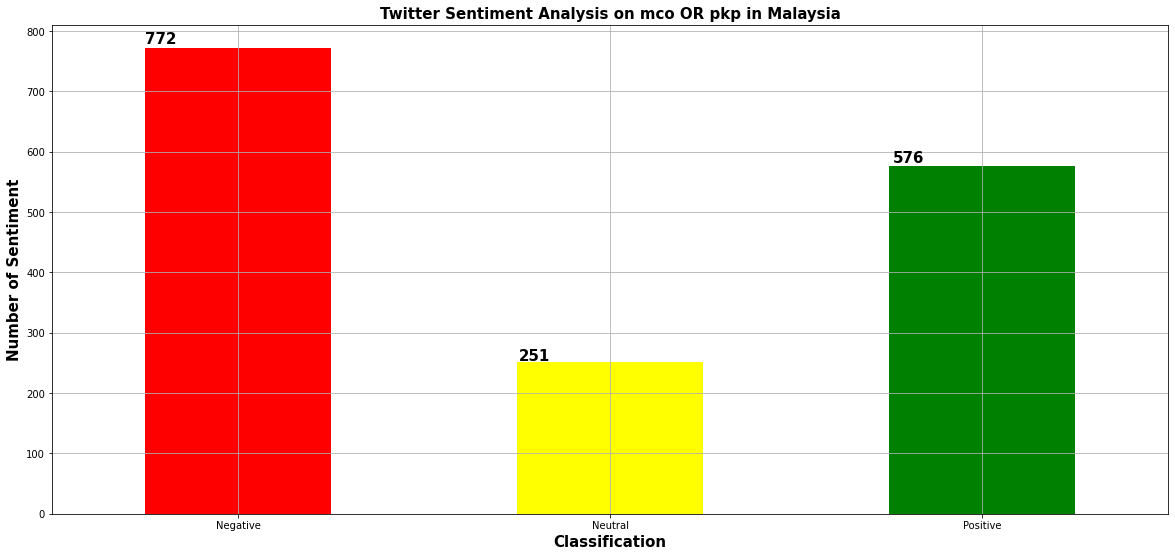

In [26]:
cls_corpus(corpus_list)